## Importing Necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)

Reading the data from the csv file

In [2]:
df = pd.read_csv('house_data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df.columns.nunique()

9

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [10]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [11]:
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


Visualizing the data

<AxesSubplot:>

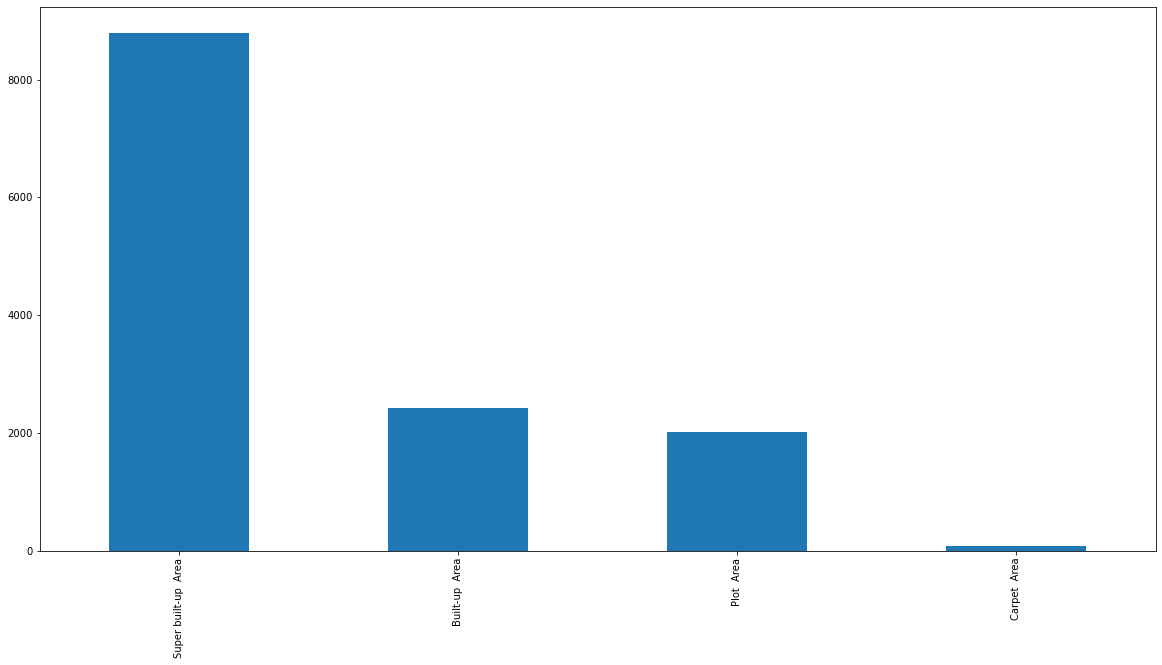

In [12]:
df.area_type.value_counts().plot(kind='bar')

Now removing the un necessary data in the datasets

In [13]:
df2 = df.drop(['area_type', 'availability', 'society', 'balcony'], axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [14]:
df2.shape

(13320, 5)

In [15]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

## Now for the data cleaning process
Removing the null values

In [16]:
df3 = df2.dropna()

In [17]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [18]:
df3.shape

(13246, 5)

## now starts the featuring process

In [19]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [20]:
## here if we look at the size column there are BHK and bedroom which are totally diferent values
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [21]:
## so from the above results in the size columns there are two different methods of showing the total numbner of beds
## Making the new column

df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\He336\AppData\Local\Temp\ipykernel_17928\2835883509.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [22]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [23]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [24]:
## Here we can see that one of the house has the 43 bedrooms which is hard to believe so let's check it
df3[df3.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [25]:
## think  that's error because 43 bedrooms with the total_sqft of 2400 seems not good so let's check the total_sqft
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

# Extracting Only Float Val or Only String Val
## Function to extract only float value, other values will be replaced as NaNs.

In [26]:
## here from the avove result we see some value in range i.e. 1133 - 1384
## For this type of value we have to perform the operation to take the average value by 1133 + 1384 / 2

def float_num(x):
    try:
        float(x)
    except:
        return False
    return True

In [27]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [28]:
df3[df3['total_sqft'].apply(float_num)].head(8) ### Here it returns the true vlues in the float_num

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4


In [29]:
df3[~df3['total_sqft'].apply(float_num)].head(8) ### Here it returns all the false values present in thje foloat_num functionm

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9


In [30]:
## now writing the function that handles the 900-69 values as well other values like 34.46Sq. Meter
def convert_to_float(x):
    values = x.split('-')
    if len(values) == 2:
        return (float(values[0]) + float(values[1]))/2
    try:
        return float(x)
    except:
        return None
    
        

In [31]:
convert_to_float('2100')

2100.0

In [32]:
convert_to_float('10 - 10')
## outputting the average of two

10.0

In [33]:
(10 + 10) / 2
## Like this

10.0

In [34]:
convert_to_float('34.46Sq. Meter')
## Here the results is none according to function

In [35]:
df3.head(3)
## Here is our original data

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3


In [36]:
## Now applying the function we wrote
## First lets make the copy good pracice

df4 = df3.copy()
df4['total_sqft'] = df3['total_sqft'].apply(convert_to_float)
df4.head(3)

## Here from the result we can see that the value in the total_sqft number is changed into float

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [37]:
df4.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [38]:
df4 = df4[df4.total_sqft.notnull()]


In [39]:
df4.shape

(13200, 6)

In [40]:
## Checking whether the function works properly or not
df4.loc[122] ## eans the value of 122 index

location      Hebbal
size           4 BHK
total_sqft    5611.5
bath             4.0
price          477.0
bhk                4
Name: 122, dtype: object

In [41]:
(3067 + 8156) /2
## It matches

5611.5

In [42]:
df4.shape ## Here we are just ignoring the (4335 Perch) values so the shape is as previous df3

(13200, 6)

## Featuring Engineering

In [43]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [44]:
## Since in real state business price per total square feet is imprtant so we are building the new column called price_per_sqft
## Doinf the operation Price / total_sqft (Since the price is in lakh we multiply it by 100000)
## First lets make a copy

df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [45]:
## Now lets come into the location column (which is a categorial or the text data and is difficult to handle)
## First lets check the total number of location data

df5['location'].nunique()


1298

In [46]:
len(df5['location'].unique())
## Here we can see that there are 1304 unique values which is really huge

1298

## For Categorial Data
using the concept of dimensolity reduction
SInce there are 1304 unique values in the location columns if we try to to dummies then we will have 1304 columns and this will
be very difficult

In [47]:
df5.location = df5.location.apply(lambda x: x.lower()) ## REmoving the shite space if there are any
## Now seeing how many different values/places are there in the location column
location_stats = df5['location'].value_counts(ascending=True)
location_stats

abshot layout        1
nti layout           1
fraser town          1
sonam layout         1
prakruthi nagar      1
                  ... 
thanisandra        232
kanakpura road     264
electronic city    302
sarjapur  road     392
whitefield         532
Name: location, Length: 1288, dtype: int64

In [48]:
x=' hello world '
y=x.strip()
print(y)

hello world


In [49]:
## Here checking the values in the location columns which has less than values 10
len(location_stats[location_stats<=5])


903

In [50]:
location_less_than_10 = location_stats[location_stats<=10]
location_less_than_10

abshot layout        1
nti layout           1
fraser town          1
sonam layout         1
prakruthi nagar      1
                    ..
dodsworth layout    10
sadashiva nagar     10
naganathapura       10
ganga nagar         10
thyagaraja nagar    10
Name: location, Length: 1048, dtype: int64

In [51]:
len(df5.location.unique())

1288

In [52]:
## The above result we will kept in the new ('Other') column
df5.location = df5.location.apply(lambda x: 'other' if x in location_less_than_10 else x) 
## the above function does is it create the new column Other and pt all the values that is less than 10 and other remains same
len(df5.location.unique())

241

In [53]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,electronic city phase ii,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,chikka tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [54]:
df5.shape

(13200, 7)

Here we will discard some more data. Because, normally if a square ft per bedroom is 300
(i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2
 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by
 keeping our minimum thresold per bhk to be 300 sqft

So if we divide total_sqft / bhk considering the total_sqft per bedroom is 300 then the output must be greater than 300 like

800 / 2 = 400 (greater than 300)
800 / 8 = 100 (less than 300)

In [55]:
df5[df5.total_sqft/df5.bhk < 300].head() ## The following results are error as 600/8 = 77.888 less than 300 (our threshold)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,hsr layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [56]:
df5[~(df5.total_sqft/df5.bhk<300)].head() ## this are good values since 1056 / 2 = 528 greater than 300

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,electronic city phase ii,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,chikka tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [57]:
df5.shape

(13200, 7)

In [58]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape
## Below is the value after removing the outliers or the wrong data

(12456, 7)

<h2>Now looking for the column 'price_per_sqft'</h2>


In [59]:
df6.price_per_sqft.describe()
## Here checking the price and seeing the minimum and maximum values per square ft
## when we see the maximum values it is extremely high as it might possible but we want to build the generic model it will be
## good to remove sunch extreme cases

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [60]:
## Here in the above figure we can see that in between 1600 - 1800 having the same sqft the price of 2 bedrroms is more than 3

## Now looking for the Bathroom parts
Suppose if we have 2 bedroom and 4 5 bathroom then that is of no use so we try to filter out those outliers

In [61]:
df8=df6
df8.bath.unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  6.,  7.,  9., 14., 12., 16., 10.,
       13.])

In [62]:
## Now lets look the data which has more than 10 bedrooms
df8[df8.bath > 10]
## The below results is quite good as there is similar equality between the bedrooms and bathrooms as well total_sqft also good

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1078,other,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
3096,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
3609,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
7979,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
8636,neeladri nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
9935,other,13 BHK,5425.0,13.0,275.0,13,5069.124424
13067,other,10 Bedroom,7150.0,13.0,3600.0,10,50349.650350


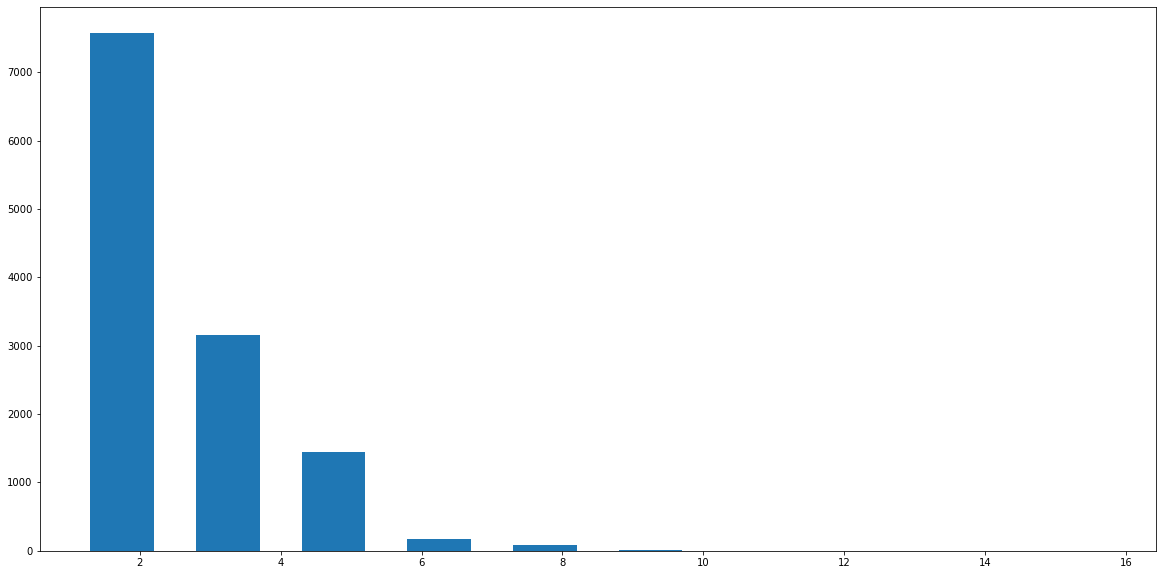

In [63]:
## Lets plot and look
plt.hist(df8.bath, rwidth=0.6)
plt.xlabel = "Number of bathrooms"
plt.ylabel = "count"

In [64]:
## Considering the fact that it is un usual to have 2 more bathrooms than the number of bedroom in a home

df8[df8.bath > df8.bhk + 2]
## These are outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1078,other,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
2620,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
6838,rajaji nagar,5 BHK,7500.0,8.0,1700.0,5,22666.666667
7709,chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
9974,other,3 Bedroom,2400.0,6.0,775.0,3,32291.666667
11366,nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
12103,thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
12443,other,4 Bedroom,4350.0,8.0,2600.0,4,59770.114943
13067,other,10 Bedroom,7150.0,13.0,3600.0,10,50349.650350


In [65]:
## So the real values is
df9 = df8[df8.bath < df8.bhk + 2]
df9.shape

(12303, 7)

In [66]:
df9.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,electronic city phase ii,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,chikka tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556


In [67]:
## Now removing un necessary columns like size and price_per_sqft because we have used in only to remove outliers
df10 = df9.drop(['size', 'price_per_sqft'], axis=1)
df10.head(3)


,location,total_sqft,bath,price,bhk
0,electronic city phase ii,1056.0,2.0,39.07,2
1,chikka tirupathi,2600.0,5.0,120.00,4
2,uttarahalli,1440.0,2.0,62.00,3


In [68]:
df10.shape

(12303, 5)

Doing one hot encoding in the location columns

In [69]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,devarachikkanahalli,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
dummies.columns

Index([' devarachikkanahalli', '1st block jayanagar', '1st phase jp nagar',
       '2nd phase judicial layout', '2nd stage nagarbhavi',
       '5th block hbr layout', '5th phase jp nagar', '6th phase jp nagar',
       '7th phase jp nagar', '8th phase jp nagar',
       ...
       'vijayanagar', 'vishveshwarya layout', 'vishwapriya layout',
       'vittasandra', 'whitefield', 'yelachenahalli', 'yelahanka',
       'yelahanka new town', 'yelenahalli', 'yeshwanthpur'],
      dtype='object', length=241)

In [71]:
## Now to aviod the dummines trap we can remove one of the columns like of we remove 1st Block Jayanagar then if it present
# then all other columns remains 0 and since reflect the original column 1st block jayanagar
df11 = pd.concat([df10,dummies], axis='columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,devarachikkanahalli,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,electronic city phase ii,1056.0,2.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chikka tirupathi,2600.0,5.0,120.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,uttarahalli,1440.0,2.0,62.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
## Now we can drop the location columns
df12 = df11.drop('location',axis='columns')
df12.head(3)

,total_sqft,bath,price,bhk,devarachikkanahalli,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df12.shape

(12303, 245)

### Now Building a Model

In [74]:
X = df12.drop('price',axis='columns')
y = df12.price

In [75]:
y.head(3)

0     39.07
1    120.00
2     62.00
Name: price, dtype: float64

In [76]:
X.shape

(12303, 244)

In [77]:
y.shape

(12303,)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [79]:
### Trting through linear regression
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train,y_train)
lreg.score(X_test,y_test)

0.4053534277576889

## Using K Fold Cross validation to check the model of linear regression

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=6, test_size=0.2, random_state=10)
cross_val_score(LinearRegression(),X, y, cv=cv)

array([0.40535343, 0.50542375, 0.44214607, 0.35319731, 0.51167382,
       0.46434354])